In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('all.csv', delimiter="\t")

In [94]:
df.head()

,Unnamed: 0,timestamp,location,track,week,pacing,rating,NPS,year
0,0,6/24/2016 7:03:34,New York,Games,1,5,6,Detractor,2016
1,1,6/24/2016 7:10:22,New York,Games,1,4,6,Detractor,2016
2,2,6/24/2016 7:03:41,New York,Apps,1,4,6,Detractor,2016
3,3,6/24/2016 7:04:59,New York,Intro,1,4,8,Passive,2016
4,4,6/24/2016 7:07:02,New York,Intro,1,3,8,Passive,2016


In [36]:
df['pacing'].unique()

array(['5', '3', '4', '2', '1', nan, 'Just right', 'A little too fast',
       'Way too slow', 'A little too slow', 'Way too fast'], dtype=object)

# Cleaning Data= most of the work:

      1) Mapping and standardizing data
      2) Aglomorating into one dataframe
      2) inputing filename into fields
      3) filtering out errors

# Solutions:
    1)  map and apply functions
    2) glob liberary
    3) Split and append filename into fields
    4) Errors: DF = DF[DF['rating'] != '#ERROR!']

====================================================================================================
# Calculate NPS for all instances
====================================================================================================



In [44]:
# Create a map for the NPS calculations

map1= {
    0: "Detractor",
    1:"Detractor",
    2:"Detractor",
    3:"Detractor",
    4:"Detractor",
    5:"Detractor",
    6:"Detractor",
    7:"Passive",
    8:"Passive",
    9:"Promoter",
    10:"Promoter"
}

In [45]:
df['rating'].unique()

array([ 6,  8, 10,  2,  4,  9,  3,  7,  5,  0,  1])

In [46]:
# Clean up reff errors


# df = df[df['rating'] != '#REF!']
# df = df[df['rating']!='#REF!#REF!']
# df = df[df['rating']!='#ERROR!']

In [47]:
df['rating'] = df['rating'].astype(int)

In [48]:
# Create new column for NPS

df['NPS']= df['rating'].map(map1)
df.head()

,Unnamed: 0,timestamp,location,track,week,pacing,rating,NPS
0,0,6/24/2016 7:03:34,NY,Games,1,5,6,Detractor
1,1,6/24/2016 7:10:22,NY,Games,1,3,6,Detractor
2,2,6/24/2016 7:03:41,NY,Apps,1,3,6,Detractor
3,3,6/24/2016 7:04:59,NY,Intro,1,3,8,Passive
4,4,6/24/2016 7:07:02,NY,Intro,1,4,8,Passive


Extract Year from timestamp

In [49]:
df[df['NPS']==0]

,Unnamed: 0,timestamp,location,track,week,pacing,rating,NPS


In [50]:
df['NPS'].unique()

array(['Detractor', 'Passive', 'Promoter'], dtype=object)

In [51]:
df['timestamp'] = df['timestamp'].fillna("9/99/2017 9:99:99")

In [52]:
# .unique() --> list of all unique values in our Series
# .unique()[0] --> first element in unique values (returns a String)
# .unique()[0].split(" ") --> splits first element (string) on space delimiter (returns a List)
# .unique()[0].split(" ")[0] --> first element (date) that occurred before the space (returns a String)
# .unique()[0].split(" ")[0][-2:] --> last two characters in string element (returns a String)

def year_cleaner(single_timestamp):
    return single_timestamp.split(" ")[0][-2:]

df['year']=df['timestamp'].apply(year_cleaner)

# df['year']=df['timestamp'].unique()[0].split(" ")[0][-2:]
df['year']=df['year'].map({'16': 2016, '17': 2017})

In [53]:
df['year'].unique()

array([2016, 2017])

In [54]:
df.head()

,Unnamed: 0,timestamp,location,track,week,pacing,rating,NPS,year
0,0,6/24/2016 7:03:34,NY,Games,1,5,6,Detractor,2016
1,1,6/24/2016 7:10:22,NY,Games,1,3,6,Detractor,2016
2,2,6/24/2016 7:03:41,NY,Apps,1,3,6,Detractor,2016
3,3,6/24/2016 7:04:59,NY,Intro,1,3,8,Passive,2016
4,4,6/24/2016 7:07:02,NY,Intro,1,4,8,Passive,2016


====================================================================
# Charts
====================================================================

In [55]:
# isolate df and count the values

nps_df = df['NPS'].value_counts()
LABELS = ['Detractor', 'Promoter', 'Passive']
colors = ['lightcoral', 'yellowgreen', 'yellow']
nps_df

Promoter     1157
Passive      1010
Detractor     274
Name: NPS, dtype: int64

([<matplotlib.patches.Wedge at 0x1a16e83860>,
 [Text(0.0897976871804247, 1.0963285891451735, 'Detractor'),
  Text(-0.4629189753255368, -0.9978507013995406, 'Promoter'),
  Text(1.0323102772536776, -0.37991511088193813, 'Passive')],
 [Text(0.048980556643868016, 0.5979974122610037, '47.4%'),
  Text(-0.2525012592684746, -0.5442822007633857, '41.4%'),
  Text(0.5630783330474605, -0.2072264241174208, '11.2%')])

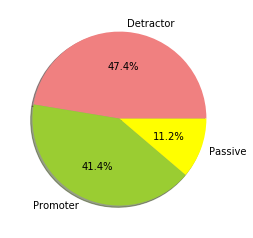

In [56]:
plt.pie(nps_df.values, labels=LABELS, colors=colors, autopct='%1.1f%%', shadow=True)

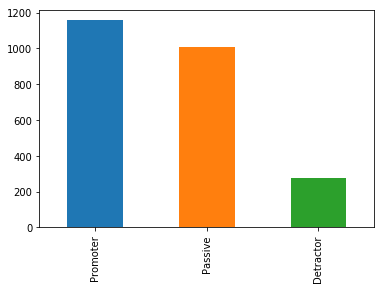

In [57]:
# in histogram

nps_df.plot(kind="bar")

# Where are these Detractors comming from?
Barplot for cities and their NPS

In [58]:
# Map locations 

df['location'].unique()

lmap= {
    'NY': 'New York',
    'SF': 'San Francisco', 
    'LA': 'Los Angeles', 
    'SV': 'Sunnyvale', 
    'SG': 'Singapore', 
    'HK': 'Hong Kong', 
    'Taipei': 'Taipei', 
    'Tokyo': 'Tokyo', 
    'Singapore': 'Singapore',
    'New York': 'New York',
    'San Francisco': 'San Francisco',
    'Sunnyvale': 'Sunnyvale',
    'Los Angeles': 'Los Angeles',
    'New York City': 'New York',
    'Redwood City': 'Redwood City',
    'Santa Clara': 'Santa Clara',
    'Oakland': 'Oakland',
    'Washington DC': 'Washington DC',
    'Chicago': 'Chicago',
    'Atlanta': 'Atlanta',
    'Hong Kong': 'Hong Kong',
    'Beijing': 'Beijing'
}

In [59]:
df['location'] = df['location'].map(lmap)

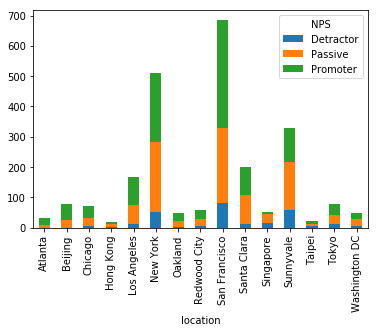

In [60]:
df.groupby(['location'])['NPS'].value_counts().unstack().plot(kind='bar', stacked=True)

# How about distribution of the track against the NPS?

In [61]:
df['track'].unique()

array(['Games', 'Apps', 'Intro', 'VR', nan], dtype=object)

In [62]:
# Drop explorer from track

explorer_map= {
    'Games': 'Games', 
    'Apps': 'Apps', 
    'Intro': 'Intro',
    'VR': 'VR',
    'Apps, Explorer': 'Apps',
    'Games, Explorer':'Games'
}


df['track']= df['track'].map(explorer_map)


df["track"].unique()

array(['Games', 'Apps', 'Intro', 'VR', nan], dtype=object)

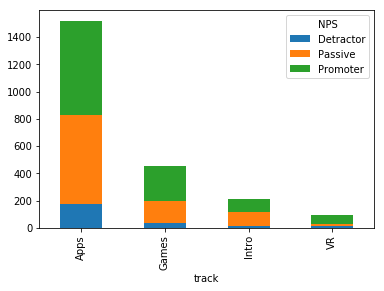

In [63]:
df.groupby(['track'])['NPS'].value_counts().unstack().plot(kind='bar', stacked=True)

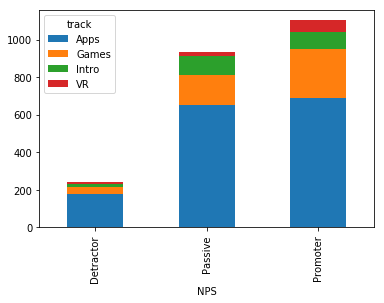

In [91]:
df.groupby(['NPS'])['track'].value_counts().unstack().plot(kind='bar', stacked=True)

In [93]:
df[df['year']==2017]['track'].unique()

array(['Apps', 'Games', 'Intro', 'VR', nan], dtype=object)

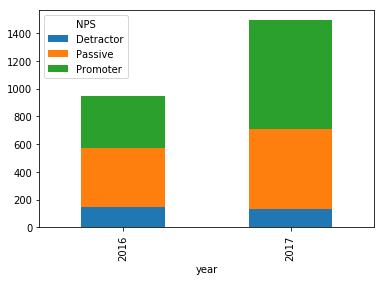

In [64]:
# by year

df.groupby(['year'])['NPS'].value_counts().unstack().plot(kind='bar', stacked=True)

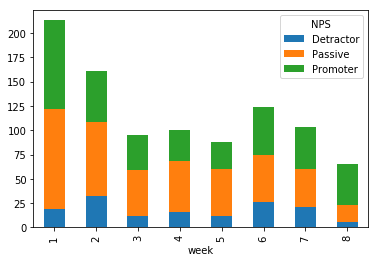

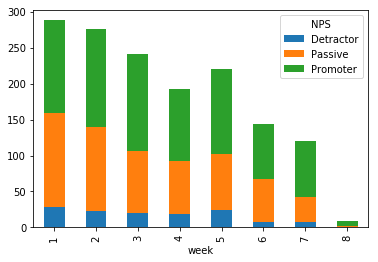

In [96]:
# Create a stack bar for NPS in 2016 data by week
df[df["year"] == 2016].groupby(['week'])['NPS'].value_counts().unstack().plot(kind='bar', stacked=True)
df[df["year"] == 2017].groupby(['week'])['NPS'].value_counts().unstack().plot(kind='bar', stacked=True)

In [65]:
df[df['year']==2016]['rating'].unique()

array([ 6,  8, 10,  2,  4,  9,  3,  7,  5])

In [66]:
# this would look better as two side by side pie charts

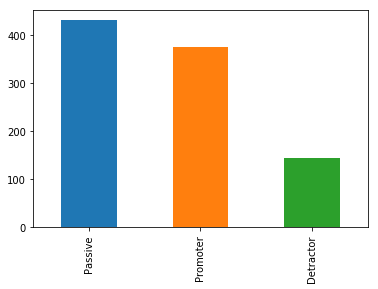

In [67]:
NPS16=df[df['year']==2016]['NPS']
NPS16.value_counts().plot(kind="bar")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


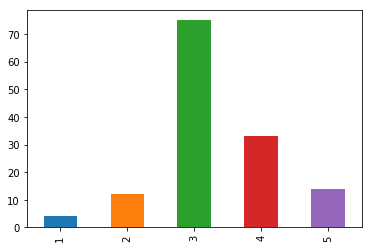

In [68]:
NPS16A=df[df['year']==2016][df['NPS']=="Detractor"]['pacing']

ratings_order = ['1', '2', '3', '4', '5']
NPS16A.value_counts().loc[ratings_order].plot(kind="bar")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


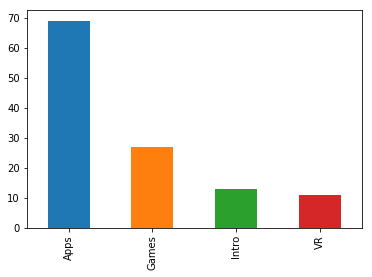

In [69]:
NPS16B=df[df['year']==2016][df['NPS']=="Detractor"]['track']
NPS16B.value_counts().plot(kind="bar")

In [71]:
df[df['year']==2016]['week'].unique()

array([1, 7, 4, 2, 3, 5, 6, 8])

In [72]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'location', 'track', 'week', 'pacing',
       'rating', 'NPS', 'year'],
      dtype='object')

In [73]:
# map pacing given the data
df['pacing'].unique()

array(['5', '3', '4', '2', '1', nan, 'Just right', 'A little too fast',
       'Way too slow', 'A little too slow', 'Way too fast'], dtype=object)

In [74]:
pace_map = {
    '5': 5, 
    '3': 4, 
    '4': 3, 
    '2': 2,
    '1': 1,
    'nan': 'nan',
    'Way too slow': 1,
    'A little too slow': 2, 
    'Just right': 3,
    'A little too fast': 4,
    'Way too fast':5
}

In [75]:
df['pacing']=df['pacing'].map(pace_map)
df['pacing'].unique()

array([5, 4, 3, 2, 1, nan], dtype=object)

In [76]:
df.head()

,Unnamed: 0,timestamp,location,track,week,pacing,rating,NPS,year
0,0,6/24/2016 7:03:34,New York,Games,1,5,6,Detractor,2016
1,1,6/24/2016 7:10:22,New York,Games,1,4,6,Detractor,2016
2,2,6/24/2016 7:03:41,New York,Apps,1,4,6,Detractor,2016
3,3,6/24/2016 7:04:59,New York,Intro,1,4,8,Passive,2016
4,4,6/24/2016 7:07:02,New York,Intro,1,3,8,Passive,2016


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


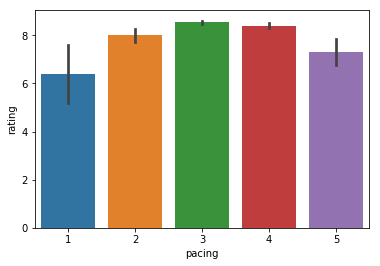

In [77]:
# Create plot tingggy

sns.barplot(x="pacing", y="rating", data=df)
plt.show()

In [78]:
df['pacing']
df["pacing"].unique()

array([5, 4, 3, 2, 1, nan], dtype=object)

# Observation #1: What kinds of questions can’t we answer with this data?

     1) Financial Data: 
             -cost vs. Satisfaction
             -Make school Cost structure and profitability



# Final Conclusions:
    1) Make school as a business needs a more comprehensive data strategy
    2) While risky Proxy data can be used to fill in the gaps. 
    3) Satisfaction with the program increased between 2016 and 2017